# LESSON 1: DEEP LEARNING INTRODUCTION
<img src="../images/ml_logo.png" width="250px"/>

## 1. Overall introduction
<img src="../images/ml_history.jpeg" width="600px"/>

Deep learning is a sub-field of Machine learning. But in 5 years recently, Deep learning has have lots of achievements by the two main reasons:
- Data explosion: 
- Hardware development:

## 2. Basic definitions in Deep learning
### 2.1. Model architecture
#### 2.1.1. Neural network
Inspired by human brain, neural network is an architecture where lots of neuron connected together.

<img src="../images/dl_nn_real.jpeg" width="400px"/>




#### 2.1.1. Activation function


### 2.2. Model feedforward and backpropagation

### 2.3. Loss function and Optimizer

## 3. Simple implementation
### 3.1. Problem
### 3.2. Solution
We use `keras` to preprocess data and build a simple neural network. `keras` is built on top of `tensorflow` and it contains consistent and simple APIs. <br>
First, we have to install `tensorflow` by running this command in jupyter notebook `!conda install -c anaconda tensorflow -y`. <br>
To install `keras`, we simply run `!conda install -c anaconda keras -y`.

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
from keras.losses import MeanSquaredError
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard

sns.set()

#### Prepare data

In [2]:
df = pd.read_csv('../data/house_prices_dataset/train.csv')
df = df.drop(columns=['Id'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Preprocess skewed data
`y_train` distribution is skewd. So we will transform `y_train` to normal distribution by using `np.log1p`.

In [3]:
# Get all numeric feature columns
numeric_col = df.dtypes[df.dtypes != "object"].index

In [4]:
# Calculate the shewness and get index of columns which are shewed
skewness = df[numeric_col].apply(lambda x: skew(x.dropna()))
skewness = skewness[skewness > 0.75]
skewness_cols = skewness.index
skewness_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [5]:
def show_with_subplot(data, cols):
    subplot_n_cols = 5
    subplot_n_rows = int(len(cols) / subplot_n_cols) + 1

    plt.figure(figsize=(15,12))
    for idx, col in enumerate(cols):
        plt.subplot(subplot_n_rows, subplot_n_cols, idx+1)
        sns.histplot(x=col, data=data)

    plt.tight_layout()
    plt.show()

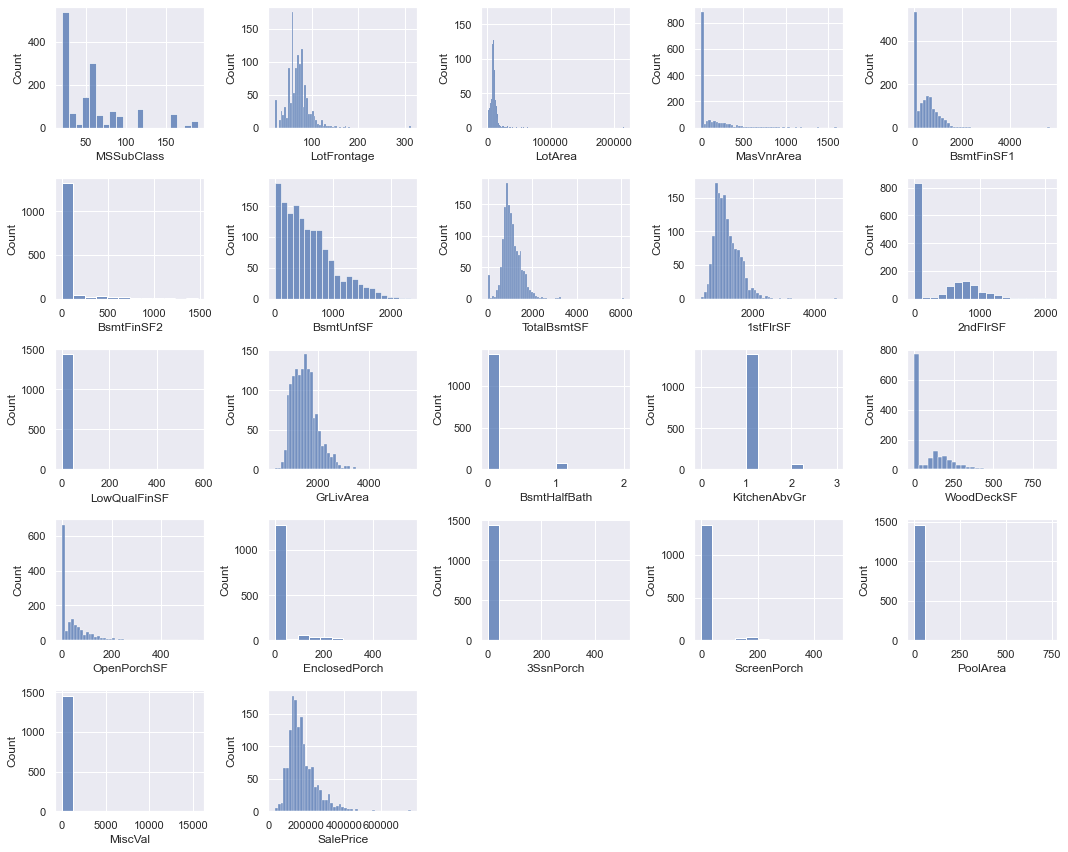

In [6]:
show_with_subplot(df, skewness_cols)

In [7]:
df[skewness_cols] = np.log1p(df[skewness_cols])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.000000,2,2008,WD,Normal,12.247699
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.000000,5,2007,WD,Normal,12.109016
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.000000,9,2008,WD,Normal,12.317171
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,NaN,NaN,NaN,0.000000,2,2006,WD,Abnorml,11.849405
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.000000,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,RL,4.143135,8.976894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.000000,8,2007,WD,Normal,12.072547
1456,3.044522,RL,4.454347,9.486152,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,MnPrv,NaN,0.000000,2,2010,WD,Normal,12.254868
1457,4.262680,RL,4.204693,9.109746,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,GdPrv,Shed,7.824446,5,2010,WD,Normal,12.493133
1458,3.044522,RL,4.234107,9.181735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.000000,4,2010,WD,Normal,11.864469


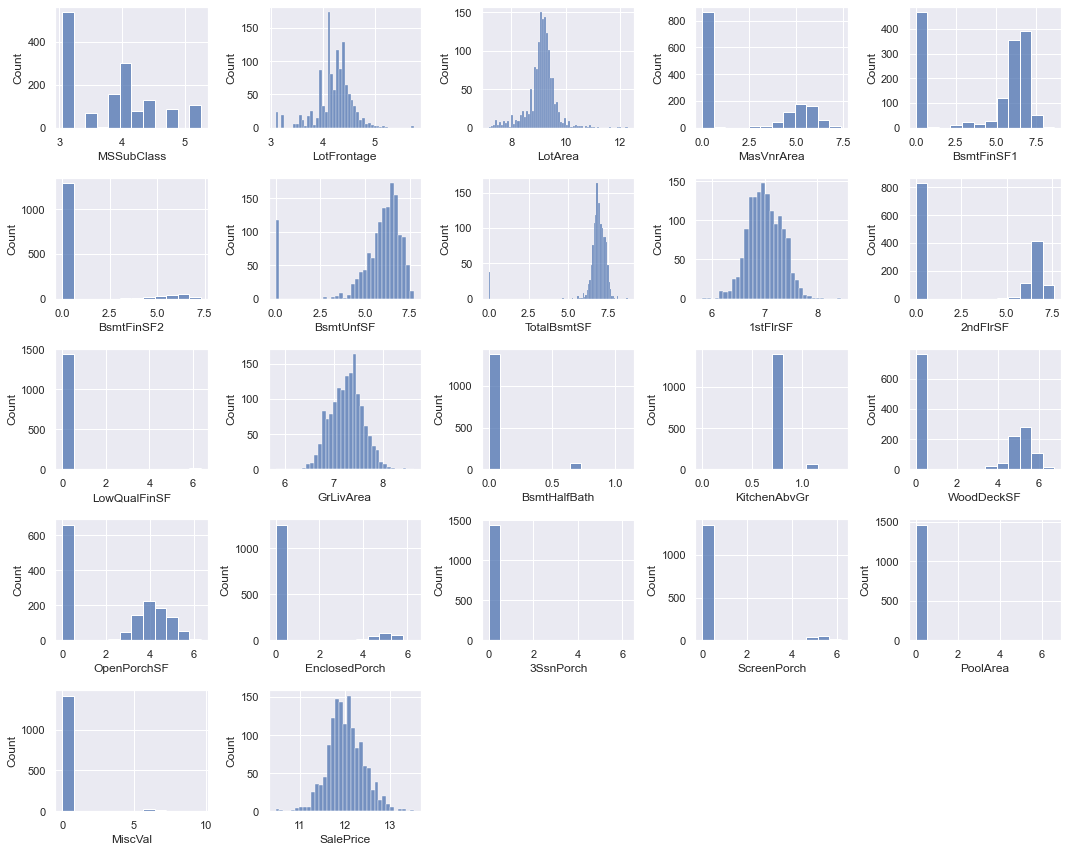

In [8]:
show_with_subplot(df, skewness_cols)

#### Preprocess `nan` value data

In [9]:
df = pd.get_dummies(df)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,0,1,0


In [10]:
df = df.fillna(df.mean())
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,0,1,0


#### Split data into train set and val set

In [11]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,0,1,0


In [12]:
shuffle_df = df.sample(frac=1, random_state=1)

In [13]:
shuffle_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
258,4.110874,4.394449,9.428351,7,5,2001,2001,5.153292,5.891644,0.000000,...,0,0,0,1,0,0,0,0,1,0
267,4.330733,4.110874,9.036106,5,8,1939,1997,0.000000,5.937536,0.000000,...,0,0,0,1,0,0,0,0,1,0
288,3.044522,4.207109,9.192176,5,5,1967,1967,3.465736,6.111467,0.000000,...,0,0,0,1,0,0,0,0,1,0
649,5.198497,3.091042,7.568896,4,6,1970,1970,0.000000,4.882802,6.214608,...,0,0,0,1,0,0,0,0,1,0
1233,3.044522,4.207109,9.405989,5,5,1959,1959,5.198497,6.908755,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3.044522,4.369448,9.224342,6,5,1974,1974,5.164786,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
905,3.044522,4.394449,9.202409,5,5,1954,1954,4.709530,5.872118,5.673323,...,0,0,0,1,0,0,0,0,1,0
1096,4.262680,4.110874,8.836810,6,7,1914,2006,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
235,5.081404,3.091042,7.427144,6,3,1971,1971,6.405228,5.883322,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [14]:
train_rate = 0.8

In [15]:
train_df = shuffle_df.iloc[:int(len(shuffle_df) * train_rate)]
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
258,4.110874,4.394449,9.428351,7,5,2001,2001,5.153292,5.891644,0.000000,...,0,0,0,1,0,0,0,0,1,0
267,4.330733,4.110874,9.036106,5,8,1939,1997,0.000000,5.937536,0.000000,...,0,0,0,1,0,0,0,0,1,0
288,3.044522,4.207109,9.192176,5,5,1967,1967,3.465736,6.111467,0.000000,...,0,0,0,1,0,0,0,0,1,0
649,5.198497,3.091042,7.568896,4,6,1970,1970,0.000000,4.882802,6.214608,...,0,0,0,1,0,0,0,0,1,0
1233,3.044522,4.207109,9.405989,5,5,1959,1959,5.198497,6.908755,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,4.795791,3.871201,8.350194,7,5,2006,2007,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
1107,4.110874,5.129899,10.054404,7,5,2006,2006,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
230,3.044522,4.304065,9.078065,6,6,1959,1959,5.398163,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
652,4.110874,4.262680,9.076923,7,5,1996,1996,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [16]:
val_df = shuffle_df.iloc[int(len(shuffle_df) * train_rate):]
val_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
610,4.110874,4.207109,9.310276,9,5,2000,2000,5.323010,6.807935,0.000000,...,0,0,0,1,0,0,0,0,1,0
1400,3.931826,3.931826,8.699681,6,7,1929,1950,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1357,3.044522,4.207109,9.436519,5,6,1971,2008,0.000000,6.599870,0.000000,...,0,0,0,1,0,0,0,0,1,0
1415,4.795791,3.951244,8.198639,7,5,2007,2007,4.875197,6.896694,0.000000,...,0,0,0,1,0,0,0,0,1,0
410,3.044522,4.234107,9.166597,5,3,1958,1958,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3.044522,4.369448,9.224342,6,5,1974,1974,5.164786,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
905,3.044522,4.394449,9.202409,5,5,1954,1954,4.709530,5.872118,5.673323,...,0,0,0,1,0,0,0,0,1,0
1096,4.262680,4.110874,8.836810,6,7,1914,2006,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
235,5.081404,3.091042,7.427144,6,3,1971,1971,6.405228,5.883322,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [17]:
x_train_df = train_df.drop(columns=['SalePrice'])
x_train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
258,4.110874,4.394449,9.428351,7,5,2001,2001,5.153292,5.891644,0.000000,...,0,0,0,1,0,0,0,0,1,0
267,4.330733,4.110874,9.036106,5,8,1939,1997,0.000000,5.937536,0.000000,...,0,0,0,1,0,0,0,0,1,0
288,3.044522,4.207109,9.192176,5,5,1967,1967,3.465736,6.111467,0.000000,...,0,0,0,1,0,0,0,0,1,0
649,5.198497,3.091042,7.568896,4,6,1970,1970,0.000000,4.882802,6.214608,...,0,0,0,1,0,0,0,0,1,0
1233,3.044522,4.207109,9.405989,5,5,1959,1959,5.198497,6.908755,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,4.795791,3.871201,8.350194,7,5,2006,2007,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
1107,4.110874,5.129899,10.054404,7,5,2006,2006,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
230,3.044522,4.304065,9.078065,6,6,1959,1959,5.398163,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
652,4.110874,4.262680,9.076923,7,5,1996,1996,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [18]:
x_val_df = val_df.drop(columns=['SalePrice'])
x_val_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
610,4.110874,4.207109,9.310276,9,5,2000,2000,5.323010,6.807935,0.000000,...,0,0,0,1,0,0,0,0,1,0
1400,3.931826,3.931826,8.699681,6,7,1929,1950,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1357,3.044522,4.207109,9.436519,5,6,1971,2008,0.000000,6.599870,0.000000,...,0,0,0,1,0,0,0,0,1,0
1415,4.795791,3.951244,8.198639,7,5,2007,2007,4.875197,6.896694,0.000000,...,0,0,0,1,0,0,0,0,1,0
410,3.044522,4.234107,9.166597,5,3,1958,1958,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3.044522,4.369448,9.224342,6,5,1974,1974,5.164786,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
905,3.044522,4.394449,9.202409,5,5,1954,1954,4.709530,5.872118,5.673323,...,0,0,0,1,0,0,0,0,1,0
1096,4.262680,4.110874,8.836810,6,7,1914,2006,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
235,5.081404,3.091042,7.427144,6,3,1971,1971,6.405228,5.883322,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [19]:
y_train_df = train_df['SalePrice']
y_train_df

258     12.352339
267     12.097936
288     11.711785
649     11.344519
1233    11.863589
          ...    
1317    12.249616
1107    12.523530
230     11.904974
652     12.160034
70      12.404928
Name: SalePrice, Length: 1168, dtype: float64

In [20]:
y_val_df = val_df['SalePrice']
y_val_df

610     12.653962
1400    11.695255
1357    11.917730
1415    12.077677
410     11.002117
          ...    
715     12.013707
905     11.759793
1096    11.751950
235     11.402005
1061    11.302217
Name: SalePrice, Length: 292, dtype: float64

#### Transform data

In [21]:
x_train = StandardScaler().fit_transform(x_train_df)
x_train

array([[ 0.41463693,  0.59673428,  0.62886363, ..., -0.13199092,
         0.48846721, -0.31919711],
       [ 0.73234998, -0.31043449, -0.14157367, ..., -0.13199092,
         0.48846721, -0.31919711],
       [-1.12631899, -0.0025746 ,  0.16497585, ..., -0.13199092,
         0.48846721, -0.31919711],
       ...,
       [-1.12631899,  0.30759203, -0.05915825, ..., -0.13199092,
         0.48846721, -0.31919711],
       [ 0.41463693,  0.17519906, -0.06140148, ..., -0.13199092,
         0.48846721, -0.31919711],
       [-1.12631899,  1.14024814,  0.81210256, ..., -0.13199092,
         0.48846721, -0.31919711]])

In [22]:
x_train.shape

(1168, 288)

In [23]:
y_train = y_train_df.values
y_train

array([12.35233947, 12.09793606, 11.71178452, ..., 11.90497431,
       12.16003394, 12.4049276 ])

In [24]:
y_train.shape

(1168,)

In [25]:
x_val = StandardScaler().fit_transform(x_val_df)
x_val

array([[ 0.46532857,  0.0100916 ,  0.34329959, ...,  0.        ,
         0.38091737, -0.24863262],
       [ 0.19886543, -0.85286659, -0.7706152 , ...,  0.        ,
         0.38091737, -0.24863262],
       [-1.12163681,  0.0100916 ,  0.57360628, ...,  0.        ,
         0.38091737, -0.24863262],
       ...,
       [ 0.6912493 , -0.29158615, -0.52045021, ...,  0.        ,
         0.38091737, -0.24863262],
       [ 1.90969135, -3.48855394, -3.0921189 , ...,  0.        ,
         0.38091737, -0.24863262],
       [-0.54202761,  1.85549086,  1.23339257, ...,  0.        ,
         0.38091737, -0.24863262]])

In [26]:
x_val.shape

(292, 288)

In [27]:
y_val = y_val_df.values
y_val

array([12.65396166, 11.69525536, 11.91773036, 12.07767662, 11.00211651,
       12.08391066, 11.91773036, 12.2185001 , 11.63071739, 11.77721864,
       12.51356102, 11.85652226, 12.09458786, 11.83501621, 12.27839796,
       12.38422302, 11.51293546, 11.29602489, 11.8167343 , 12.08954445,
       12.66033109, 11.44036552, 12.66033109, 12.17819258, 11.81303746,
       11.90497431, 12.66270921, 11.41145736, 11.92504174, 11.71178452,
       11.90159023, 12.15478461, 12.72486942, 11.75587949, 12.71640515,
       12.22588017, 11.96400745, 11.79056478, 12.69158354, 12.01370681,
       12.69158354, 13.22672519, 12.29225493, 12.12269647, 11.77529742,
       11.94406482, 12.34583894, 11.82408722, 12.29911207, 12.31268687,
       12.01461549, 11.75979336, 11.69525536, 11.56647571, 11.85652226,
       12.3327097 , 12.47801017, 11.98916586, 11.97939159, 12.09369311,
       12.4761036 , 12.06681633, 11.77529742, 11.87688084, 11.63515195,
       11.71178452, 12.39669714, 11.9117083 , 11.51293546, 11.77

In [28]:
y_val.shape

(292,)

#### Prepare configs

In [29]:
n_units = 1
lr = 1e-1
lr_factor = 0.1
lr_patience = 2
lr_min = 1e-10
folder_path = 'dl_example'
train_batch_size = 512
val_batch_size = 512
shuffle_train_set = True
n_epoch = 100

#### Build model

In [30]:
model = Sequential([
    Dense(units=n_units, input_dim=x_train.shape[1])
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


#### Init loss function

In [31]:
mse_loss = MeanSquaredError()

#### Init optimizer

In [32]:
adam_opt = Adam(learning_rate=lr)

#### Init callbacks

In [33]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=lr_factor, patience=lr_patience, min_lr=lr_min)

In [34]:
os.system(f'rm -r {folder_path}')
os.mkdir(folder_path)

In [36]:
checkpoint = ModelCheckpoint(os.path.join(folder_path, 'model/model_{epoch:02d}.h5'))

#### Train model

In [37]:
model.compile(loss=mse_loss, optimizer=adam_opt)

In [38]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=train_batch_size,
    epochs=n_epoch,
    validation_data=(x_val, y_val),
    shuffle=shuffle_train_set,
    validation_batch_size=val_batch_size,
    callbacks=[checkpoint, reduce_lr]
)

Epoch 1/100
3/3 [==============================] - 1s 459ms/step - loss: 154.1379 - val_loss: 143.8405
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 145.4848 - val_loss: 134.2783
Epoch 3/100
3/3 [==============================] - 0s 50ms/step - loss: 135.6332 - val_loss: 126.1808
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 126.7025 - val_loss: 121.1358
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 121.0024 - val_loss: 114.4399
Epoch 6/100
3/3 [==============================] - 0s 41ms/step - loss: 114.1584 - val_loss: 107.9546
Epoch 7/100
3/3 [==============================] - 0s 42ms/step - loss: 107.9202 - val_loss: 102.5949
Epoch 8/100
3/3 [==============================] - 0s 30ms/step - loss: 103.2922 - val_loss: 97.0614
Epoch 9/100
3/3 [==============================] - 0s 37ms/step - loss: 96.2809 - val_loss: 91.1349
Epoch 10/100
3/3 [==============================] - 0s 52ms/step - loss: 91.5862 - v

Epoch 83/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0544 - val_loss: 0.0895
Epoch 84/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0515 - val_loss: 0.0849
Epoch 85/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0453 - val_loss: 0.0774
Epoch 86/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0388 - val_loss: 0.0700
Epoch 87/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0342 - val_loss: 0.0661
Epoch 88/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0315 - val_loss: 0.0642
Epoch 89/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0282 - val_loss: 0.0646
Epoch 90/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0279 - val_loss: 0.0627
Epoch 91/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0227 - val_loss: 0.0599
Epoch 92/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0215 - val_loss: 0.0590
Epoch 93/1

#### Evaluate trained model

In [39]:
train_loss = history.history['loss']
train_loss

[157.13954162597656,
 145.027099609375,
 135.27310180664062,
 126.11068725585938,
 121.44197082519531,
 114.47634887695312,
 107.83616638183594,
 103.09391021728516,
 96.86814880371094,
 90.82422637939453,
 86.07937622070312,
 80.76152038574219,
 75.28633117675781,
 70.97566986083984,
 66.67718505859375,
 61.77204513549805,
 58.48868179321289,
 54.20167541503906,
 50.70722961425781,
 47.3735237121582,
 44.09020233154297,
 40.99404525756836,
 38.11845397949219,
 35.367698669433594,
 32.85734558105469,
 30.29807472229004,
 28.532651901245117,
 26.193384170532227,
 24.194744110107422,
 21.92430877685547,
 20.634836196899414,
 18.72858238220215,
 17.334339141845703,
 15.932506561279297,
 14.331480979919434,
 13.674275398254395,
 11.995590209960938,
 11.084261894226074,
 10.047094345092773,
 9.146013259887695,
 8.386826515197754,
 7.651340484619141,
 6.891354560852051,
 6.36237096786499,
 5.7676920890808105,
 5.184087753295898,
 4.698135852813721,
 4.146584510803223,
 3.9902360439300537,
 3

In [40]:
val_loss = history.history['val_loss']
val_loss

[143.84048461914062,
 134.2782745361328,
 126.1808090209961,
 121.13579559326172,
 114.43988037109375,
 107.95457458496094,
 102.5948715209961,
 97.06143188476562,
 91.13485717773438,
 86.12529754638672,
 81.26022338867188,
 75.90538787841797,
 71.72990417480469,
 67.19351196289062,
 61.9704475402832,
 58.73081588745117,
 54.34111022949219,
 50.730873107910156,
 47.61592483520508,
 44.32390594482422,
 41.510501861572266,
 38.690887451171875,
 35.74016189575195,
 32.959632873535156,
 30.76230812072754,
 28.503328323364258,
 26.541561126708984,
 24.35089874267578,
 22.201488494873047,
 20.93359375,
 18.780162811279297,
 17.49915313720703,
 16.03910255432129,
 14.46986198425293,
 13.59504508972168,
 12.149079322814941,
 11.277910232543945,
 10.172259330749512,
 9.342525482177734,
 8.393126487731934,
 7.667469501495361,
 6.946573257446289,
 6.391294002532959,
 5.73205041885376,
 5.286351203918457,
 4.67255163192749,
 4.172565460205078,
 4.0690107345581055,
 3.482625961303711,
 3.2030112743

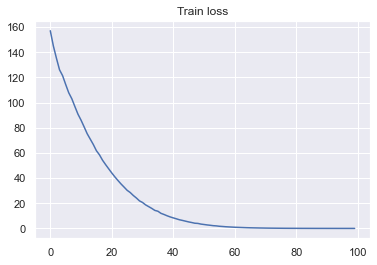

In [42]:
sns.lineplot(x=range(n_epoch), y=train_loss)
plt.title('Train loss')
plt.show()

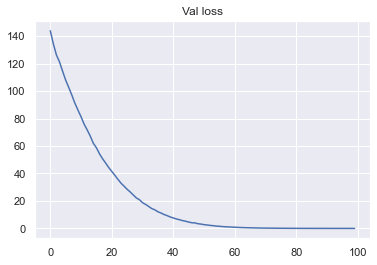

In [43]:
sns.lineplot(x=range(n_epoch), y=val_loss)
plt.title('Val loss')
plt.show()

#### Use model to predict